## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
dataset=pd.read_csv("Ads_CTR_Optimisation.csv")
dataset.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [3]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [4]:
dataset.isna().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

## UCB Implementation

In [5]:
import math
N=len(dataset.transpose())*[0]
R=len(dataset.transpose())*[0]
ads_selected=[]
total_reward=0
data=dataset.values
for n in range(len(data)):
    ad=0
    max_upper_bound=0
    for i in range(len(data.transpose())):
        if N[i]>0:
            average_reward=R[i]/N[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/N[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    N[ad]+=1
    R[ad]+=data[n][ad]
    ads_selected.append(ad+1)
    total_reward+=data[n][ad]

print("Best Ad:", max(set(ads_selected), key=ads_selected.count))
print("Reward earned:",total_reward)

Best Ad: 5
Reward earned: 2178


## Visualizations

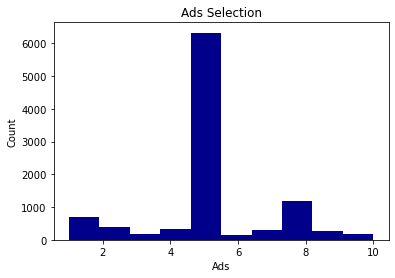

In [6]:
plt.hist(ads_selected, color="darkblue")
plt.title("Ads Selection")
plt.xlabel("Ads")
plt.ylabel("Count")
plt.show()